In [2]:
import datetime

import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

In [25]:

coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start = datetime.date(2017, 1 ,1)
end = datetime.date(2024, 11, 2)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
result.text

'{"bpi":{"2017-01-01":964.325,"2017-01-02":1009.9738,"2017-01-03":1028.3338,"2017-01-04":1047.1,"2017-01-05":1140.385,"2017-01-06":985.9388,"2017-01-07":837.8363,"2017-01-08":923.5238,"2017-01-09":889.3388,"2017-01-10":905.2263,"2017-01-11":910.6063,"2017-01-12":772.6613,"2017-01-13":784.8938,"2017-01-14":820.6888,"2017-01-15":821.1963,"2017-01-16":830.74,"2017-01-17":848.5813,"2017-01-18":890.2938,"2017-01-19":888.0625,"2017-01-20":896.1638,"2017-01-21":920.5888,"2017-01-22":934.7775,"2017-01-23":920.365,"2017-01-24":912.2125,"2017-01-25":898.55,"2017-01-26":901.05,"2017-01-27":912.8438,"2017-01-28":919.795,"2017-01-29":920.8288,"2017-01-30":916.9113,"2017-01-31":921.3513,"2017-02-01":973.065,"2017-02-02":982.8275,"2017-02-03":1020.09,"2017-02-04":1011.215,"2017-02-05":1029.4012,"2017-02-06":1019.3125,"2017-02-07":1029.4088,"2017-02-08":1067.7088,"2017-02-09":1072.205,"2017-02-10":974.9588,"2017-02-11":997.2275,"2017-02-12":1004.7138,"2017-02-13":1004.8538,"2017-02-14":994.58,"2017-02

In [26]:
data = pd.read_json(result.text).iloc[:-2,:1]
data.index.name = 'date'
data.index = pd.to_datetime(data.index)
data

/tmp/ipykernel_590851/4004453840.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_json(result.text).iloc[:-2,:1]


,bpi
date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850
...,...
2024-06-28,60342.8004
2024-06-29,60928.0117
2024-06-30,62802.5703


<Axes: xlabel='date'>

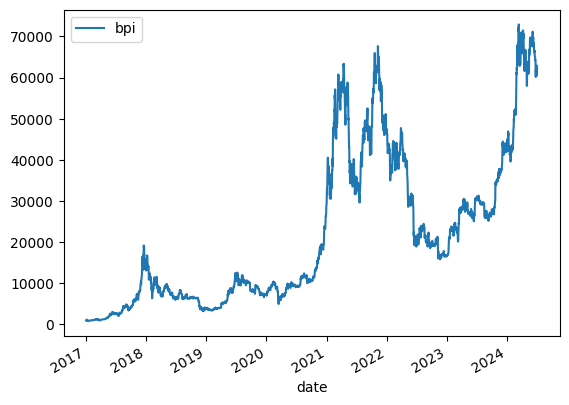

In [27]:
data.plot()


In [29]:
data.resample('QE').mean()

,bpi
date,
2017-03-31,1032.854171
2017-06-30,1914.986338
2017-09-30,3481.034815
2017-12-31,9292.903147
2018-03-31,10473.551614
2018-06-30,7734.210633
2018-09-30,6782.595947
2018-12-31,5153.967428
2019-03-31,3745.025510


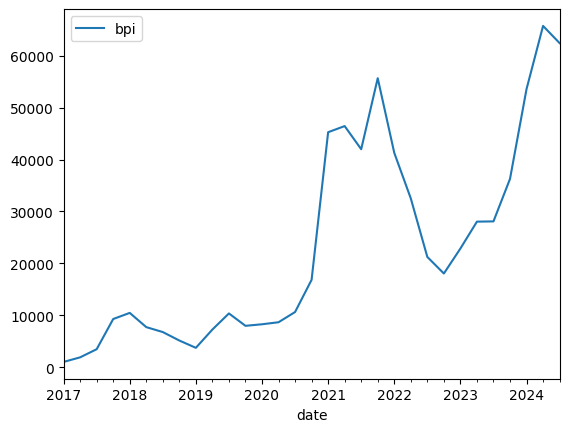

In [33]:
data.resample('QE').mean().plot();


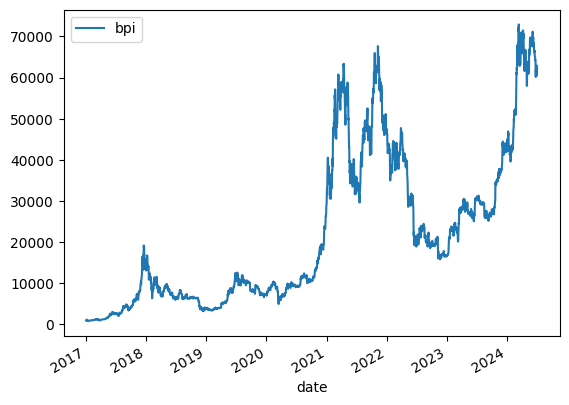

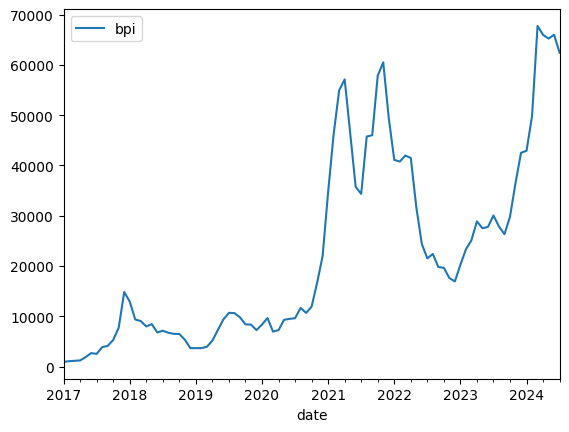

In [34]:
data.plot()
data.resample('ME').mean().plot();

In [36]:
data[:5]

,bpi
date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850


In [35]:
data[:5].diff()

,bpi
date,
2017-01-01,NaN
2017-01-02,45.6488
2017-01-03,18.3600
2017-01-04,18.7662
2017-01-05,93.2850


In [37]:
data[:5].diff(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,64.0088
2017-01-04,37.1262
2017-01-05,112.0512


<Axes: xlabel='date'>

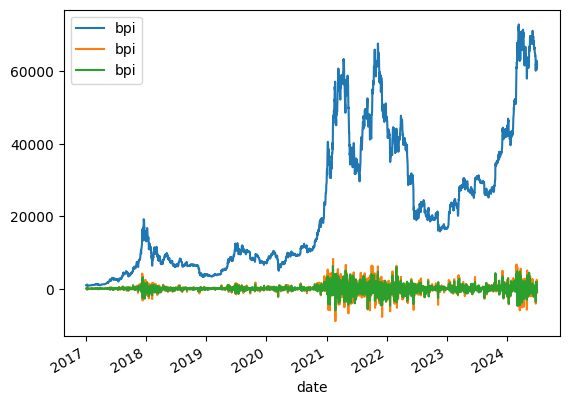

In [38]:
pd.concat([data['bpi'], data['bpi'].diff(2), data['bpi'].diff()],axis=1).plot()

In [39]:
data[:5]

,bpi
date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850


In [40]:
data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,964.3250
2017-01-03,1009.9738
2017-01-04,1028.3338
2017-01-05,1047.1000


In [45]:
data[:5].shift(freq=pd.DateOffset(days=2))

,bpi
date,
2017-01-03,964.3250
2017-01-04,1009.9738
2017-01-05,1028.3338
2017-01-06,1047.1000
2017-01-07,1140.3850


In [46]:
data[:5] - data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,45.6488
2017-01-03,18.3600
2017-01-04,18.7662
2017-01-05,93.2850


<Axes: xlabel='date'>

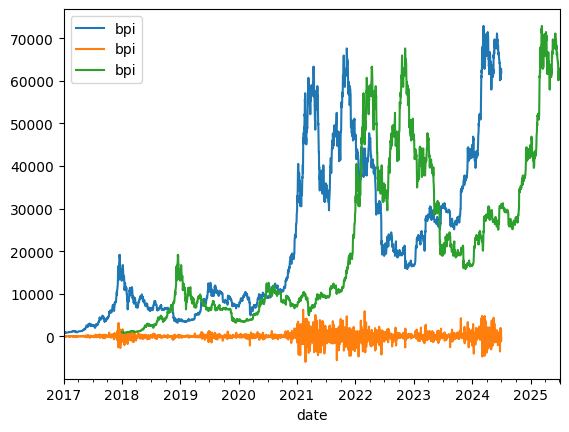

In [47]:
pd.concat([data,data-data.shift(), data.shift(freq=pd.DateOffset(days=365))],axis=1).plot()

<Axes: xlabel='date'>

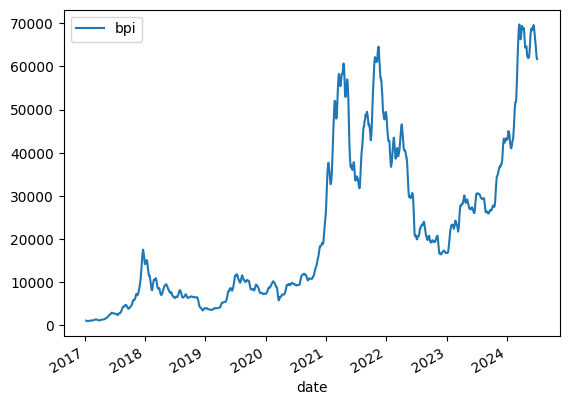

In [48]:
data.rolling(window=10).mean().plot()

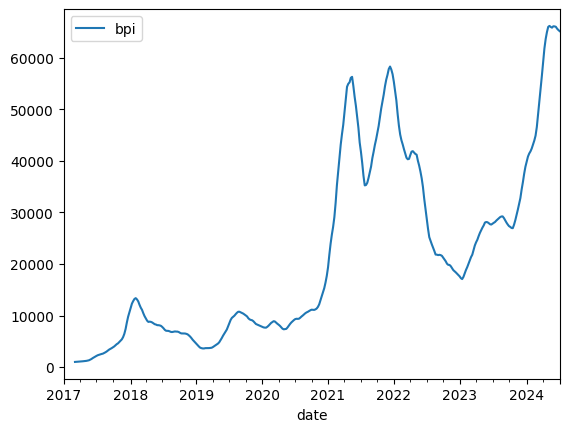

In [51]:
data.resample('W').mean().rolling(window=10).mean().plot();

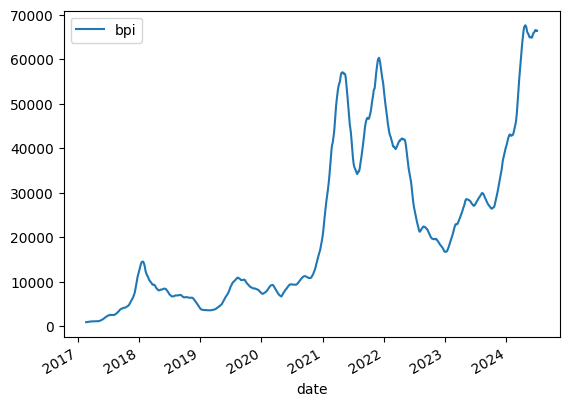

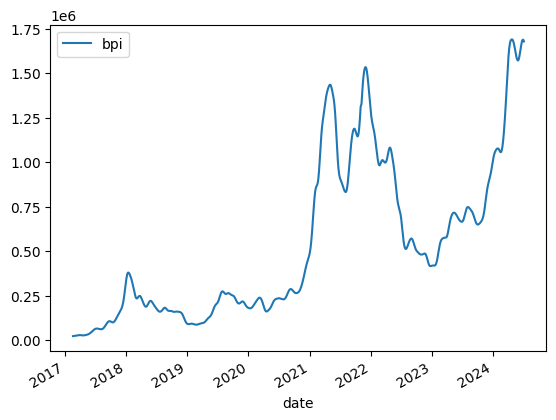

In [52]:
data.rolling(window=50).mean().plot()
data.rolling(window=50, win_type='gaussian').sum(std=10).plot();

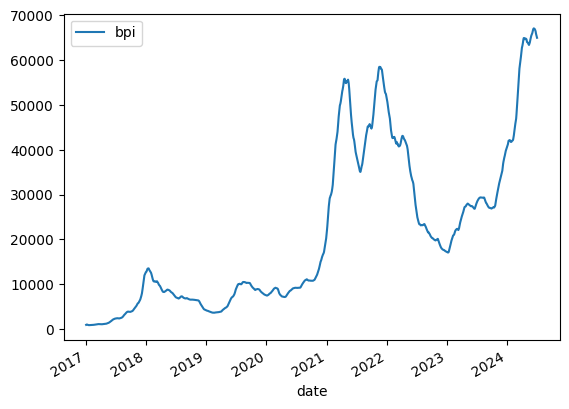

In [53]:
data.ewm(span=50).mean().plot();

<Axes: xlabel='date'>

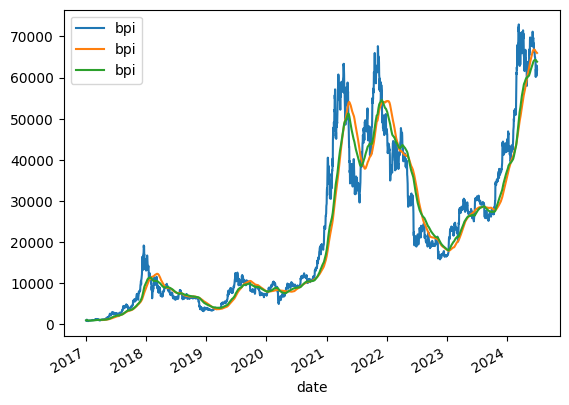

In [54]:
pd.concat([data,data.rolling(window=100).mean(), data.ewm(span=100).mean()],axis=1).plot()